<a href="https://colab.research.google.com/github/MeghanaSen/-HD5210-homework-/blob/main/final/final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS5210 - 2024 - Final Project


---

# Project Description

This data analysis project examines the correlation of heart disease incidence and suicide rates with the help of the National Health Interview Survey (NHIS) data and global suicide rates. The study uses a wide range of data transformations, statistical analyses, and visualisation techniques to extract patterns and trends in both health conditions that are under study. The paper analyzes the gender differences, temporal trends between 2000 and 2016, and geographical distribution of health outcomes based on the systematic data processing and integration.

The analysis is structured around several key components: Descriptive analysis on suicide rates by sex and year, graphical representation of the trends, time series regression analysis to analyze temporal trends and cross sectional analysis of country differences. The languages used in the project are Python with data manipulation package pandas, regression package scikit-learn, and visualization packages seaborn and matplotlib. The study shows that women are more vulnerable to heart diseases than men and that men are more likely to commit suicide than women, the global suicide rate has been declining over the years, and there are huge differences between countries, especially in Eastern European countries. Such findings are useful to explain the interactions between physical and mental health consequences in different demographic and geographical populations.



# Datasets


---

# NHIS Adult Summary Health Statistics

Link - https://data.cdc.gov/NCHS/NHIS-Adult-Summary-Health-Statistics/25m4-6qqq/about_data

The NHIS Adult Summary Health Statistics dataset is provided by the CDC’s National Center for Health Statistics and gathers extensive data from the National Health Interview Survey. This large and comprehensive database offers prevalence and incidence data on numerous health disorders, practices, and results in adults in the USA, especially with reference to chronic diseases such as cardiovascular diseases, diabetes, and cancer, and health risk factors and utilization of health services. It is disaggregated by sex, age, race/ethnicity and other social characteristics which makes it useful for the study of health inequalities and trends within and between population groups. The structure of the dataset contains outcome indicators, grouping categories, percentage estimates, confidence intervals, and a description of how each health measure was measured by survey questions which make it useful for researchers and public health professionals in population health studies.


---

# Mental Health and Suicide Rates

Link - https://www.kaggle.com/datasets/twinkle0705/mental-health-and-suicide-rates

Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

Suicide is a complex issue and therefore suicide prevention efforts require coordination and collaboration among multiple sectors of society, including the health sector and other sectors such as education, labour, agriculture, business, justice, law, defense, politics, and the media. These efforts must be comprehensive and integrated as no single approach alone can make an impact on an issue as complex as suicide.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


nhis = pd.read_csv("/content/NHIS_Adult_Summary_Health_Statistics_20241209.csv")
nhis.head()

,Outcome (or Indicator),Grouping category,Group,Percentage,Confidence Interval,Title,Description,Year
0,Coronary heart disease,Total,Total,4.6,"4.3, 4.9",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
1,Coronary heart disease,Sex,Male,5.9,"5.5, 6.3",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
2,Coronary heart disease,Sex,Female,3.4,"3.1, 3.7",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
3,Coronary heart disease,Age groups with 65+,18-34 years,0.3,"0.2, 0.5",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
4,Coronary heart disease,Age groups with 65+,35-49 years,0.9,"0.6, 1.2",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019


In [ ]:
suicide = pd.read_excel("/content/Age-standardized suicide rates.xlsx")
suicide.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [ ]:
suicide.columns

Index(['Country', 'Sex', 2016, 2015, 2010, 2000], dtype='object')

# Transformations

Transformation 1 - Extract Heart Disease Data:
This transformation makes a copy of the NHIS dataset and removes all records that are not concerning coronary heart disease. This is important because it assists in filtering important heart disease pattern from a list of all health conditions that might be in our data set. By using .copy(), we make sure that we are working with a new copy of the data and not the original data by any chance.

Transformation 2 - Melt Years into Single Column:
The suicide data is initially in a wide format where years are spread across columns (2016, 2015, 2010, 2000). This operation can be performed with melt() which turns this into a long format in which each year is a row, more useful for time series analysis and plotting. It is especially useful for comparing variables over time, and it’s easier to merge with other datasets if those also are formatted in long form.

Transformation 3 - Standardize Sex Categories:
This transformation confirms uniformity in labeling of sex categories whereby ‘Both sexes’ has been replaced by ‘Total’ in both the first and second set of datasets. It is very crucial to make sure that all the various categories follow the same name since this assists in merging of data since the same category might have different names hence creating confusion when assimilating information. Such generalization makes it possible to compare and combine data obtained from both sources most reliably.

Transformation 4 - Calculate Year-over-Year Change:
The transformation which makes the data resulted from the previous step makes the sets of suicide rate by country, sex and year, and the output allows to calculate the difference of suicide rate between the closest years for every country and sex group after sorting the data by Country, Sex, and Year. This provides understanding into how suicide rates are evolving with time in certain populations. The groupby operation makes it possible to make changes within the correct categories, reducing cross-country or sex calculation mistakes.

Transformation 5 - Create Country-Level Summaries:
This last transformation of the data involves the averaging of the suicide rate data at the country and year level. This gives an overview of the suicide rate by country over time erasing the sex differences. This summary is useful to get an overview of the trend in a country and to compare the result of different countries without the complication of sex difference.

In [ ]:
nhis['Year'] = nhis['Year'].astype(str)

# First transformation: Extract heart disease data
heart_disease_data = nhis[nhis['Outcome (or Indicator)'] == 'Coronary heart disease'].copy()
heart_disease_data.head()

,Outcome (or Indicator),Grouping category,Group,Percentage,Confidence Interval,Title,Description,Year
0,Coronary heart disease,Total,Total,4.6,"4.3, 4.9",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
1,Coronary heart disease,Sex,Male,5.9,"5.5, 6.3",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
2,Coronary heart disease,Sex,Female,3.4,"3.1, 3.7",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
3,Coronary heart disease,Age groups with 65+,18-34 years,0.3,"0.2, 0.5",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
4,Coronary heart disease,Age groups with 65+,35-49 years,0.9,"0.6, 1.2",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019


In [ ]:
# Second transformation: Clean suicide data by melting years into a single column
year_columns = [2016, 2015, 2010, 2000]
suicide_melted = suicide.melt(
    id_vars=['Country', 'Sex'],
    var_name='Year',
    value_vars=year_columns,
    value_name='Suicide_Rate'
)
suicide_melted.head()

,Country,Sex,Year,Suicide_Rate
0,Afghanistan,Both sexes,2016,6.4
1,Afghanistan,Male,2016,10.6
2,Afghanistan,Female,2016,2.1
3,Albania,Both sexes,2016,5.6
4,Albania,Male,2016,7.0


In [ ]:
# Third transformation: Standardize sex categories between dataset
suicide_melted['Sex'] = suicide_melted['Sex'].replace({
    'Both sexes': 'Total',
    'Male': 'Male',
    'Female': 'Female'
})

suicide_melted.head()

,Country,Sex,Year,Suicide_Rate
0,Afghanistan,Both sexes,2016,6.4
1,Afghanistan,Male,2016,10.6
2,Afghanistan,Female,2016,2.1
3,Albania,Both sexes,2016,5.6
4,Albania,Male,2016,7.0


In [ ]:
# Fourth transformation: Calculate year-over-year change in suicide rates
suicide_melted = suicide_melted.sort_values(['Country', 'Sex', 'Year'])
suicide_melted['YoY_Change'] = suicide_melted.groupby(['Country', 'Sex'])['Suicide_Rate'].diff()

suicide_melted.head()

,Country,Sex,Year,Suicide_Rate,YoY_Change
1647,Afghanistan,Both sexes,2000,8.1,NaN
1098,Afghanistan,Both sexes,2010,7.4,-0.7
549,Afghanistan,Both sexes,2015,6.6,-0.8
0,Afghanistan,Both sexes,2016,6.4,-0.2
1649,Afghanistan,Female,2000,1.7,NaN


In [ ]:
# Fifth transformation: Create country-level summaries
country_summaries = suicide_melted.groupby(['Country', 'Year'])['Suicide_Rate'].mean().reset_index()
country_summaries.head()

,Country,Year,Suicide_Rate
0,Afghanistan,2000,8.033333
1,Afghanistan,2010,7.333333
2,Afghanistan,2015,6.533333
3,Afghanistan,2016,6.366667
4,Albania,2000,5.866667


# Aggregations

First Aggregation - Average Heart Disease Rates by Sex:
This type of gathering works on the condition and extracts sex-based statistics of heart disease from the available data by choosing only those rows in the database where ’Grouping category’ is ‘Sex’. By generating a new data set for the sex-specific incidence of heart diseases, we are able to identify how the incidence of heart diseases varies between males and females which is useful in understanding gender disparities in health. This filtered dataset gives a clearer understanding of the gender-specific heart disease distribution not skewed by other demographic categorizations.
By making a copy using .copy() we have a separate data frame which can be manipulated without changing the original data. This filtered dataset then becomes a basis for further investigation into gender-based trends in heart diseases and allows us to contrast these trends with other health indicators such as suicide rates across genders. This isolation of sex based data is especially useful for health care policy making and to understand gender based risk factors.

Second Aggregation - Global Trends by Year:
This aggregation provides a summary of suicide rates by using year and sex as dimensions, and using mean, standard deviation, and count as measures. The mean gives the average suicide rate for each year-sex combination, the standard deviation gives the spread or variability in rates and count gives the number of data points that went into each statistic making the averages more reliable.
By applying reset_index() the grouped up data is converted back into a basic panda’s DataFrame form which can now be used for further analysis and plotting. This approach offers more information about the global and temporal distribution of suicide rates and the differences between sexes than the mere means and their comparison. This is important not only to describe the central tendencies of suicide rates and their variability across the different population groups and particularly, different time periods.

In [ ]:
# First aggregation: Average heart disease rates by sex
heart_disease_by_sex = heart_disease_data[heart_disease_data['Grouping category'] == 'Sex'].copy()
heart_disease_by_sex.head()

,Outcome (or Indicator),Grouping category,Group,Percentage,Confidence Interval,Title,Description,Year
1,Coronary heart disease,Sex,Male,5.9,"5.5, 6.3",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
2,Coronary heart disease,Sex,Female,3.4,"3.1, 3.7",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
4029,Coronary heart disease,Sex,Male,5.9,"5.5, 6.3",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2020
4030,Coronary heart disease,Sex,Female,3.5,"3.2, 3.8",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2020
8057,Coronary heart disease,Sex,Male,6.3,"5.9, 6.8",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2021


In [ ]:
# Second aggregation: Global trends by year
global_trends = suicide_melted.groupby(['Year', 'Sex'])['Suicide_Rate'].agg([
    'mean', 'std', 'count'
]).reset_index()

global_trends.head()

,Year,Sex,mean,std,count
0,2000,Both sexes,11.996721,7.761358,183
1,2000,Female,6.368306,4.530383,183
2,2000,Male,18.127322,13.190515,183
3,2010,Both sexes,10.414754,6.444987,183
4,2010,Female,5.481421,4.187223,183


In [ ]:
# Let's examine the unique values in each dataset
print("Heart Disease Data Categories:")
print("\nGrouping categories:")
print(nhis['Grouping category'].unique())
print("\nGroups:")
print(nhis['Group'].unique())
print("\nYears:")
print(nhis['Year'].unique())

print("\nSuicide Data Categories:")
print("\nSex categories:")
print(suicide_melted['Sex'].unique())
print("\nYears:")
print(suicide_melted['Year'].unique())

Heart Disease Data Categories:

Grouping categories:
['Total' 'Sex' 'Age groups with 65+' 'Age groups with 75+' 'Race'
 'Hispanic or Latino origin and race' 'Education' 'Marital status'
 'Urbanicity' 'Region' 'Metropolitan statistical area status'
 'Health insurance coverage: Under 65'
 'Health insurance coverage: 65 and over' 'Employment status'
 'Family income' 'Nativity' 'Disability status' 'Sexual orientation'
 'Social vulnerability' 'Veteran Status' 'Poverty status']

Groups:
['Total' 'Male' 'Female' '18-34 years' '35-49 years' '50-64 years'
 '65 years and over' '18-44 years' '45-64 years' '65-74 years'
 '75 years and over' 'White, single race' 'Black only'
 'American Indian or Alaska Native only' 'Asian only'
 'Native Hawaiian or Other Pacific Islander only' 'Black and White'
 'American Indian or Alaska Native and White' 'Hispanic'
 'Mexican/Mexican American' 'Non-Hispanic' 'White only, non-Hispanic'
 'Black only, non-Hispanic' 'Other races, non-Hispanic'
 'Less than high school 

# Joining the Datasets for analysis

The first join analysis is based on the comparison of the proportion of heart disease and suicide rate by sexes, although the time series of the two datasets differs: heart disease data – 2019-2023 and suicide data – 2016. The study shows that there are significant differences between men and women in both health conditions.

For heart disease, male has higher prevalence rate every year from 5.9% to 6.4% while female has lower rate from 3.4% to 3.7%. This is about 1.7 times higher prevalence of heart disease in male than in female and points to a gender difference in health that does not change significantly over the five-year period of 2019-2023.

The suicide rate information from 2016 reveals a starker gender split as well. Male suicide rate is 14.6 suicide per 100,000 population while the female suicide rate is 5.1 suicide per 100,000 population. The general (both male and female) suicide rate is at 9.7/100000 which is as expected lower than the male rate but higher than the female rate. This data also shows that both heart disease and suicide are more prevalent in males, but the gender disparity is considerably higher in the suicide rate.

These gender disparities can be well represented by the bar plots presented side by side. The left plot gives the heart disease prevalence by sex with clear error bars to show statistical uncertainty and the right plot gives the suicide rates across sex categories. The fact that these health metrics are presented side by side makes it easier to compare gender patterns of the two diseases, and the trend remains the same – higher risk for males.



Heart Disease by Sex (2019):
          Sex  Heart_Disease_Pct  Year
1        Male                5.9  2019
2      Female                3.4  2019
4029     Male                5.9  2020
4030   Female                3.5  2020
8057     Male                6.3  2021
8058   Female                3.6  2021
12085    Male                6.4  2022
12086  Female                3.6  2022
16113  Female                3.7  2023
16114    Male                6.0  2023

Suicide Rates by Sex (2016):
Sex
Both sexes     9.682514
Female         5.092896
Male          14.602186
Name: Suicide_Rate, dtype: float64


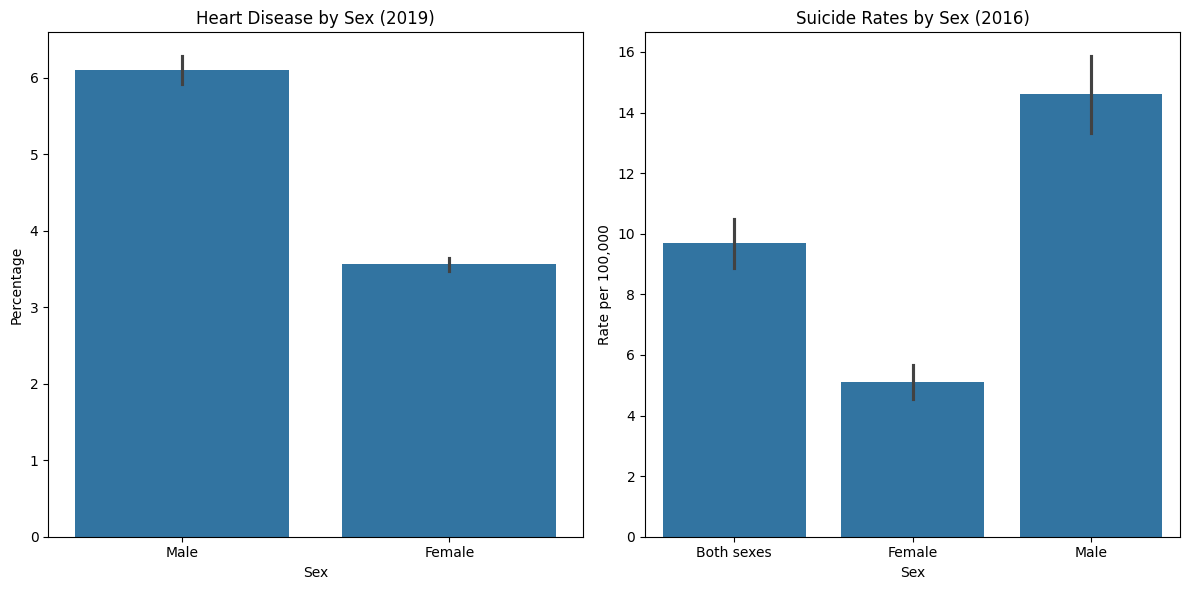

In [ ]:
import seaborn as sns
# Clean and prepare heart disease data
heart_sex = nhis[
    (nhis['Outcome (or Indicator)'] == 'Coronary heart disease') &
    (nhis['Grouping category'] == 'Sex')
]
heart_sex = heart_sex[['Group', 'Percentage', 'Year']]
heart_sex.columns = ['Sex', 'Heart_Disease_Pct', 'Year']

# Clean and prepare suicide data
suicide_clean = suicide_melted.copy()
# Remove leading/trailing spaces from Sex categories
suicide_clean['Sex'] = suicide_clean['Sex'].str.strip()
# Convert year to string for matching
suicide_clean['Year'] = suicide_clean['Year'].astype(str)

# Sex-based analysis (since we can't join by year)
print("\nHeart Disease by Sex (2019):")
print(heart_sex)

print("\nSuicide Rates by Sex (2016):")
suicide_2016 = suicide_clean[suicide_clean['Year'] == '2016'].groupby('Sex')['Suicide_Rate'].mean()
print(suicide_2016)

# Visualization of sex-based comparison
plt.figure(figsize=(12, 6))

# Plot 1: Heart Disease by Sex
plt.subplot(1, 2, 1)
sns.barplot(data=heart_sex, x='Sex', y='Heart_Disease_Pct')
plt.title('Heart Disease by Sex (2019)')
plt.ylabel('Percentage')

# Plot 2: Suicide Rates by Sex
plt.subplot(1, 2, 2)
suicide_plot_data = suicide_clean[suicide_clean['Year'] == '2016']
sns.barplot(data=suicide_plot_data, x='Sex', y='Suicide_Rate')
plt.title('Suicide Rates by Sex (2016)')
plt.ylabel('Rate per 100,000')

plt.tight_layout()
plt.show()

The second join looks at temporal trends in both heart diseases and suicides, although they are not in the same time frame, with heart disease in 2019-2023 and suicides in 2000-2016. The study shows that there are different trends in both diseases throughout their periods.

The rate of heart diseases is relatively increasing then stabilizing. It was 4.6% in 2019-2020, raised to 4.9% in 2021-2022 and then marginally declined to 4.8% in 2023. The two figures indicate a fairly stable occurrence somewhat oscillating within the five-year interval under consideration; hence, the rates at which cases of heart diseases are being experienced in recent year are relatively consistent.

The rates of suicide too portray a declining trend, when observed over a more extended period of time. The rate began at around 12.0 per 100,000 population in 2000 and declined to 10.4 in 2010, and then to 9.8 in 2015 and 9.7 in 2016. This is the case because the number of suicides that occurred in the 16-year period in total has reduced by approximately 19%.

These trends are well captured in the dual-axis visualization with heart disease percentage represented on the left axis in blue and suicide rates per one hundred thousand in red on the right axis. Although the time series do not overlap, one can make a comparison of the long-term trend in suicide rates (which is decreasing) with the relatively stable rates of heart disease in the more recent years. To avoid confusion, the scales and time periods of the two sets of data are indicated in the title of the graph.


Heart Disease Trend:
       Year  Percentage
0      2019         4.6
4028   2020         4.6
8056   2021         4.9
12084  2022         4.9
16112  2023         4.8

Suicide Rate Trend:
Year
2000    11.996721
2010    10.414754
2015     9.807104
2016     9.682514
Name: Suicide_Rate, dtype: float64


<Figure size 1000x600 with 0 Axes>

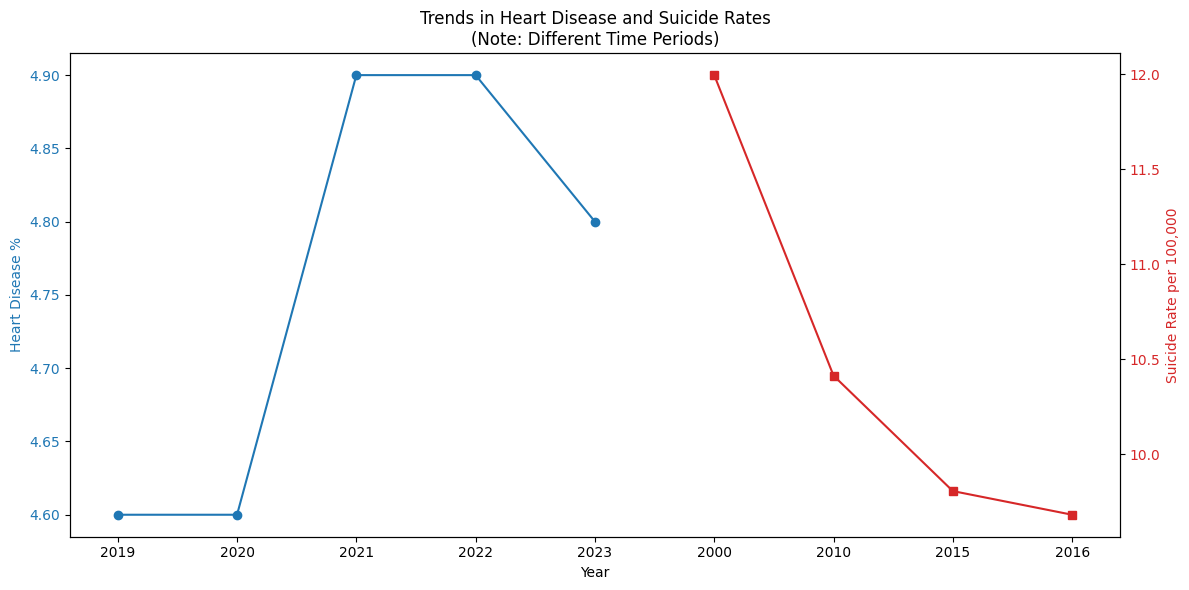

In [ ]:
# Trend Analysis
# Heart Disease Trend
heart_trend = nhis[
    (nhis['Outcome (or Indicator)'] == 'Coronary heart disease') &
    (nhis['Grouping category'] == 'Total')
]
print("\nHeart Disease Trend:")
print(heart_trend[['Year', 'Percentage']])

# Suicide Trend
suicide_trend = suicide_clean[suicide_clean['Sex'] == 'Both sexes'].groupby('Year')['Suicide_Rate'].mean()
print("\nSuicide Rate Trend:")
print(suicide_trend)

# Visualization of trends
plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots(figsize=(12, 6))

# Heart Disease Trend
ax1.set_xlabel('Year')
ax1.set_ylabel('Heart Disease %', color='tab:blue')
ax1.plot(heart_trend['Year'], heart_trend['Percentage'], color='tab:blue', marker='o', label='Heart Disease')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Suicide Rate Trend
ax2 = ax1.twinx()
ax2.set_ylabel('Suicide Rate per 100,000', color='tab:red')
ax2.plot(suicide_trend.index, suicide_trend.values, color='tab:red', marker='s', label='Suicide Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Trends in Heart Disease and Suicide Rates\n(Note: Different Time Periods)')
fig.tight_layout()
plt.show()

# Visualizations

Heart Disease Prevalence by Sex Plot:
This bar plot evidently shows that there is a high incidence of heart diseases among males which is about 6% while that of female is about 3.5%. The plot also shows error bars for the statistical uncertainty of these measurements and the axes are clearly labeled, so it is easy to compare the percentage differences between the groups. This visualization helps to draw attention to the fact that males have almost twice the risk of heart disease than females.

Global Suicide Rate Distribution by Year Plot:
The box plot below shows the distribution of the suicide rates by different years (2000, 2010, 2015, and 2016) with measures of central tendency and spread. The box in each part represents the quartiles of the distribution, the line through the box represents the median, and the whiskers represent the range of rates, and the dots above the whiskers represent the outlier values. The median rates and the extreme values have a tendency to decrease from 2000 to 2016, while the highest outliers are approximately 80 per 100,000 in 2000 and have declined each year, but the boxes have not changed much between each year.

Suicide Rates by Sex Over Time Plot:
This line plot with confidence intervals represents the trends of suicide rates from 2000 to 2016 by sex; the male (green line) has the highest rate around 15-18 per 100,000 while the female (orange line) has the lowest rate around 5-6 per 100,000; the combined rate (blue line) is between these two. The shaded areas around each line indicate confidence intervals, and the general trend is a decrease in rates for all subgroups over the 16-year period with relatively constant ratios of male to female rates.



Text(0, 0.5, 'Percentage')

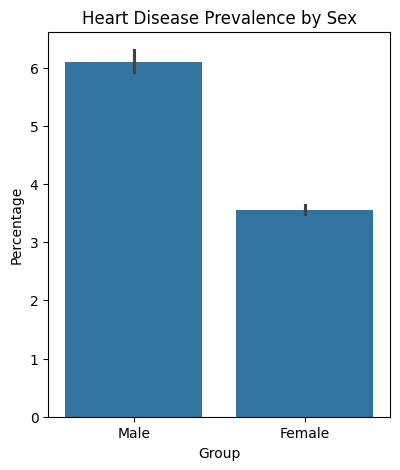

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create visualizations
plt.figure(figsize=(15, 5))

# Visualization 1: Heart Disease Prevalence by Sex
plt.subplot(1, 3, 1)
sns.barplot(
    data=heart_disease_by_sex,
    x='Group',
    y='Percentage'
)
plt.title('Heart Disease Prevalence by Sex')
plt.ylabel('Percentage')

([0, 1, 2, 3],
 [Text(0, 0, '2000'),
  Text(1, 0, '2010'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016')])

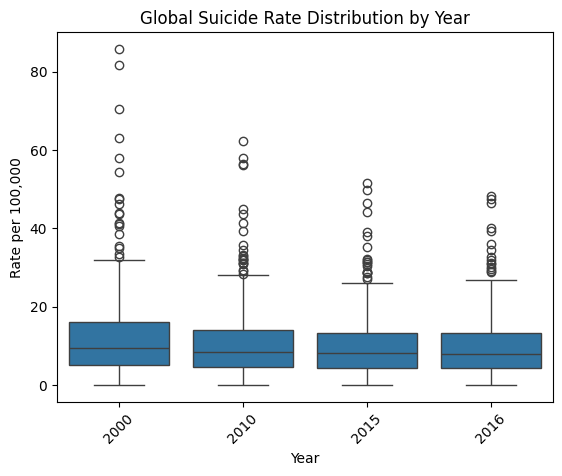

In [ ]:
# Visualization 2: Global Suicide Trends by Year
sns.boxplot(
    data=suicide_melted,
    x='Year',
    y='Suicide_Rate'
)
plt.title('Global Suicide Rate Distribution by Year')
plt.ylabel('Rate per 100,000')
plt.xticks(rotation=45)

<ipython-input-52-552039e50839>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


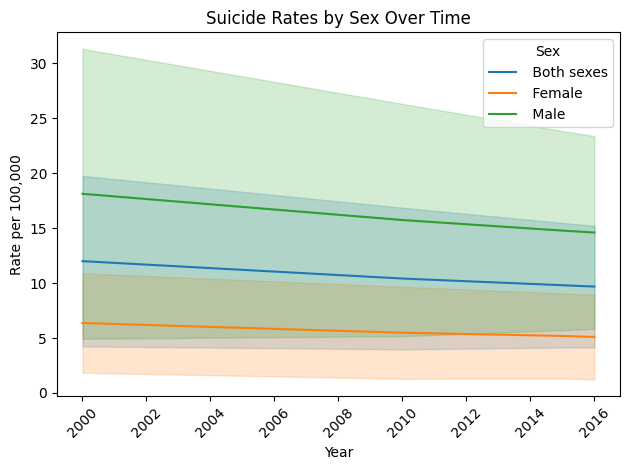

In [ ]:
sns.lineplot(
    data=suicide_melted[suicide_melted['Sex'] != 'Both sexes'],
    x='Year',
    y='Suicide_Rate',
    hue='Sex',
    ci='sd'
)
plt.title('Suicide Rates by Sex Over Time')
plt.ylabel('Rate per 100,000')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
suicide_melted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 1647 to 547
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       2196 non-null   object 
 1   Sex           2196 non-null   object 
 2   Year          2196 non-null   object 
 3   Suicide_Rate  2196 non-null   float64
 4   YoY_Change    1647 non-null   float64
dtypes: float64(2), object(3)
memory usage: 167.5+ KB


# Statistical Analysis

The `basic_stats` function applies a range of statistical tests in analysing suicide rate data with respect to three aspects. First, it defines global summary measures of suicide rates, including the mean, standard deviation, median, and percentiles, and so on for the whole data set. After that, it divides these statistics into the sex categories, which gives more information about how suicide rates vary among the groups. In the end, it analyses yearly variation through descriptive statistics mean, STD, min and Max for accurate temporal view of how suicide rate has been changing from time to time.

This combination of axes is built by the `plot_trends` function and includes three informative graphs drawn in one figure. It generates three subplots: a box plot of suicide rates by year, another box plot of suicide rates by sex, and one more box plot of changes in suicide rates over the years. Every plot is well formatted with proper titles, rotated axis labels where necessary and tight layout to enable visibility of all the items.

The `time_regression` function performs a time series regression analysis to get a predicted suicide rate for each year. It starts by converting years to numeric format, the data is then divided into training and testing set. Once a linear regression model has been fitted, it computes and shows relevant assessment statistics (R² score, Root Mean Squared Error, Slope). Last but not least, it displays the regression results in the form of actual versus predicted values, which gives both numeric and graphic interpretation of the temporal characteristics of suicide rates.

The `country_analysis` function analyzes suicide rates at the country level and provides statistical results and plots. It begins by computing a variety of statistics (mean, standard deviation, minimum, maximum, and count) for each country and then rank them according to the mean suicide rate. It then selects the top 10 countries by average suicide rate and builds a box plot to compare the suicide rates of these countries. The plot has rotated country labels to enhance the readability and the patterns of suicide rates are easy to distinguish between the nations.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
def basic_stats(data):
    """
    Calculate basic statistics for suicide rates by sex and year.
    """
    # Overall statistics
    print("\nOverall Suicide Rate Statistics:")
    print(data['Suicide_Rate'].describe())

    # Statistics by Sex
    print("\nSuicide Rate Statistics by Sex:")
    print(data.groupby('Sex')['Suicide_Rate'].describe())

    # Yearly trends
    yearly_stats = data.groupby('Year')['Suicide_Rate'].agg(['mean', 'std', 'min', 'max'])
    print("\nYearly Suicide Rate Trends:")
    print(yearly_stats)

In [ ]:
def plot_trends(data):
    """
    Create visualizations for suicide rate trends.
    """
    plt.figure(figsize=(15, 5))

    # Plot 1: Box plot by year
    plt.subplot(131)
    sns.boxplot(data=data, x='Year', y='Suicide_Rate')
    plt.title('Suicide Rates Distribution by Year')
    plt.xticks(rotation=45)

    # Plot 2: Box plot by sex
    plt.subplot(132)
    sns.boxplot(data=data, x='Sex', y='Suicide_Rate')
    plt.title('Suicide Rates Distribution by Sex')

    # Plot 3: Year-over-Year changes
    plt.subplot(133)
    sns.boxplot(data=data, x='Year', y='YoY_Change')
    plt.title('Year-over-Year Changes in Suicide Rates')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
def time_regression(data):
    """
    Perform regression analysis to predict suicide rates based on year.
    """
    # Convert years to numeric format
    data['Year_Numeric'] = pd.to_numeric(data['Year'])

    # Prepare data for regression
    X = data['Year_Numeric'].values.reshape(-1, 1)
    y = data['Suicide_Rate'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("\nTime-based Regression Results:")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"Slope (change per year): {model.coef_[0]:.3f}")

    # Plot regression results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.xlabel('Year')
    plt.ylabel('Suicide Rate')
    plt.title('Suicide Rate Time Regression')
    plt.legend()
    plt.show()


In [ ]:
def country_analysis(data):
    """
    Analyze suicide rates by country.
    """
    # Calculate country-level statistics
    country_stats = data.groupby('Country')['Suicide_Rate'].agg([
        'mean', 'std', 'min', 'max', 'count'
    ]).sort_values('mean', ascending=False)

    print("\nTop 10 Countries by Average Suicide Rate:")
    print(country_stats.head(10))

    # Visualize top 10 countries
    plt.figure(figsize=(12, 6))
    top_10_countries = country_stats.head(10).index
    sns.boxplot(data=data[data['Country'].isin(top_10_countries)],
                x='Country', y='Suicide_Rate')
    plt.xticks(rotation=45, ha='right')
    plt.title('Suicide Rates Distribution for Top 10 Countries')
    plt.tight_layout()
    plt.show()

The first round of simple statistical analysis provides a wealth of information about the global suicide rates. The average mean suicide rate is 10.61 suicides per 100000 population, and the standard error is a significant 8.65, which points to a lot of volatile between-nation differences. The results reveal the gender differences in the rates where males have the mean rate of 15.81 and females 5.53, and the total rate of both male and female is 10.48. The temporal analysis of mean rates depicts a declining trend from 12.16 in 2000 to 9.79 in 2016 which indicate an improvement over the period under consideration.

The statistical results of the regression analysis carried out on the time-series data are not very encouraging at first glance. The value of R² = 0.013 which is very small means that year alone predicts very little of the variance in suicide rates over time. A reading of 9.105 is somewhat large considering the scale of the data, so the model contains considerable error in its predictions. However, the result indicates the generally declining trend of rates over time with the slope coefficient of - 0.128 consistent with the hypothesized negative relationship.

The country-level analysis reveals that there are several countries with high suicide rates, the highest mean rate is observed in the Russian Federation 35.13 per 100,000; Lithuania 34.16. All of these top 10 countries have mean rates higher than 21 per 100,000, which is much higher than the global rate. The standard deviations for these countries are also quite high and for Russia it is 24.44 while Lithuania is 23.03 which means, that these countries could have big differences in indicator rates within years or between different groups of population.

These findings are well depicted in the visualizations as they depict the declining trend in suicide rates, the male dominated gender differences and the variation in the suicide rates across different countries. The box plots reveal the median as well as the range of the data and at the same time display outlying values. The time regression plot helps confirm the low correlation between time and suicide rates because the points are scattered widely around the regression line. The box plots for each country also show the large differences between countries and changes over time within the country.

Starting Suicide Rate Analysis...

Overall Suicide Rate Statistics:
count    2196.000000
mean       10.606831
std         8.649094
min         0.000000
25%         4.600000
50%         8.500000
75%        14.200000
max        85.800000
Name: Suicide_Rate, dtype: float64

Suicide Rate Statistics by Sex:
            count       mean        std  min    25%    50%     75%   max
Sex                                                                     
Both sexes  732.0  10.475273   6.465952  0.2  5.975   9.40  13.425  47.5
Female      732.0   5.533743   4.141528  0.0  2.700   4.70   7.000  32.6
Male        732.0  15.811475  10.618390  0.0  8.900  13.95  20.800  85.8

Yearly Suicide Rate Trends:
           mean        std  min   max
Year                                 
2000  12.164117  10.378318  0.1  85.8
2010  10.544991   8.620174  0.0  62.3
2015   9.925683   7.633241  0.0  51.5
2016   9.792532   7.469341  0.0  48.3


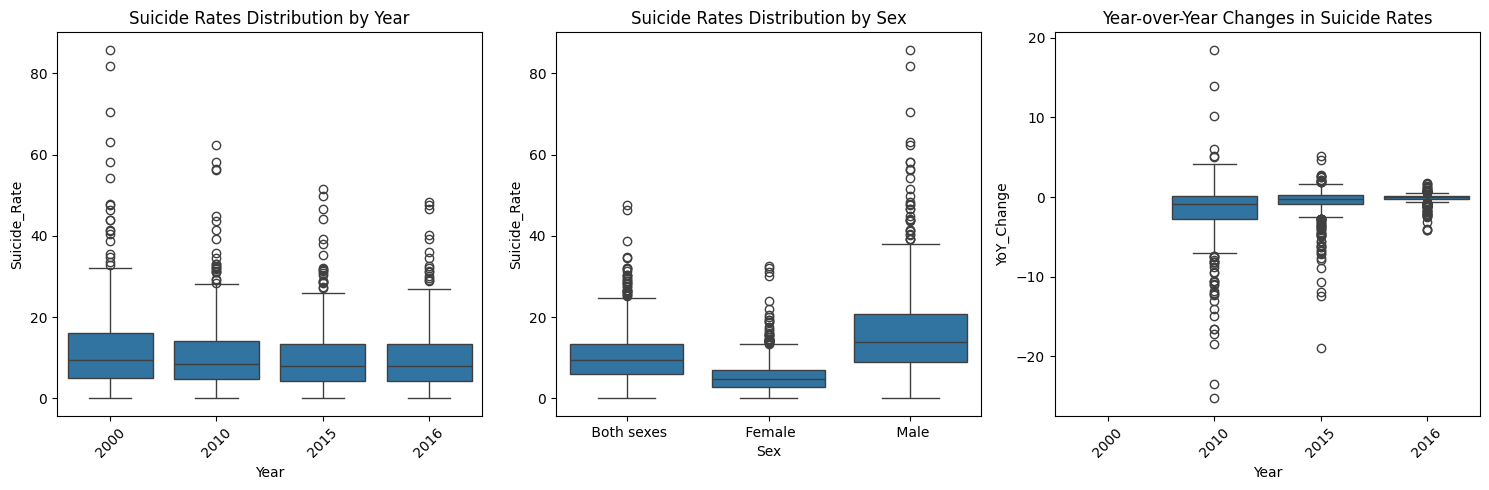


Time-based Regression Results:
R² Score: 0.013
RMSE: 9.105
Slope (change per year): -0.128


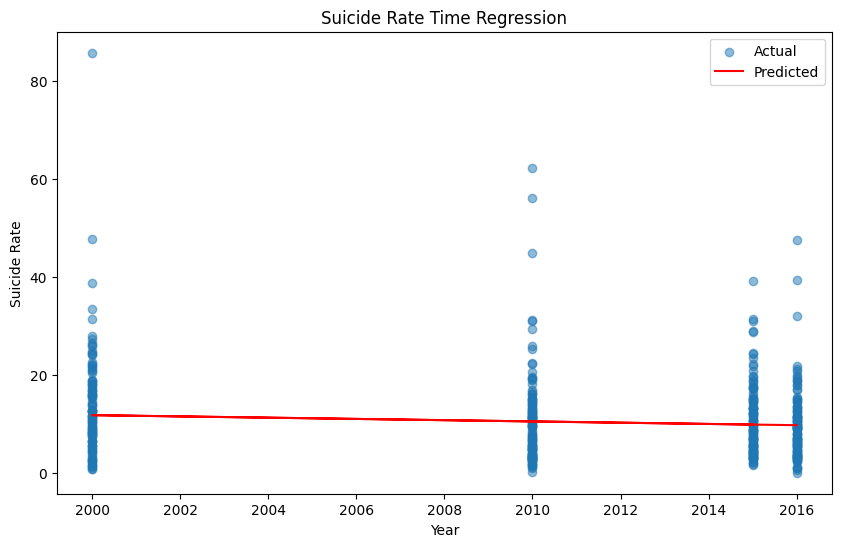


Top 10 Countries by Average Suicide Rate:
                         mean        std   min   max  count
Country                                                    
Russian Federation  35.133333  24.437316   7.5  85.8     12
Lithuania           34.158333  23.029367   6.7  81.7     12
Kazakhstan          29.641667  18.824571   7.7  63.1     12
Belarus             29.425000  20.746177   6.1  70.4     12
Guyana              29.266667  13.308940  12.8  46.6     12
Lesotho             27.200000   4.086118  21.3  32.6     12
Suriname            25.733333  12.151942  10.9  43.7     12
Ukraine             23.925000  16.721251   4.7  58.1     12
Latvia              21.591667  15.208219   4.2  54.3     12
Republic of Korea   21.358333   9.220083   8.5  39.3     12


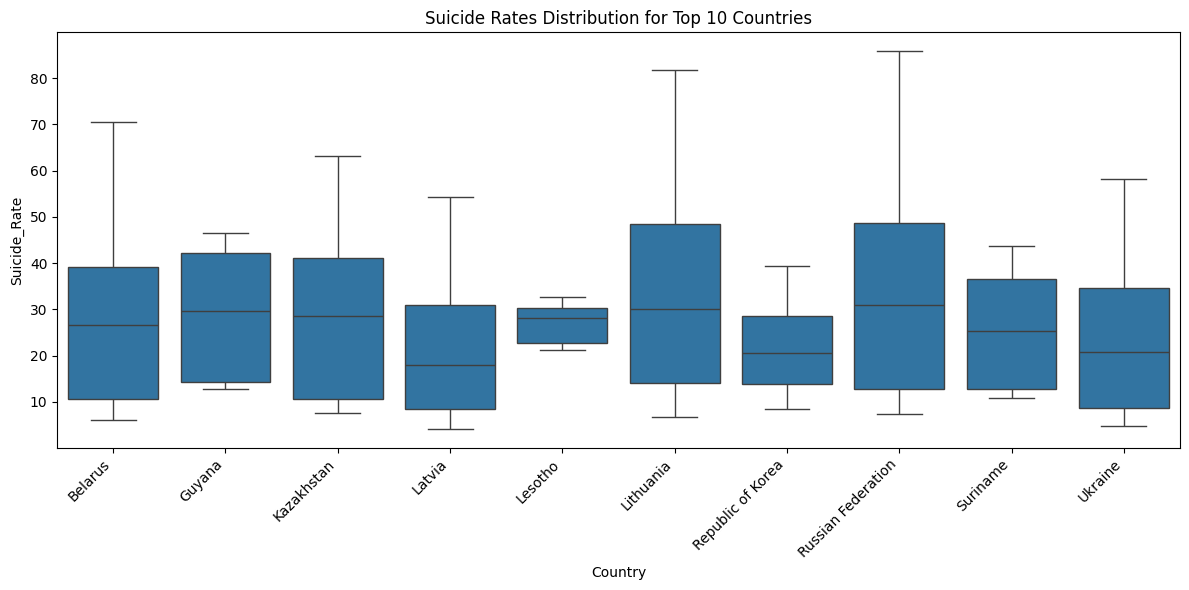


Analysis Complete!


In [ ]:
def main(suicide_melted):
    """
    Run all analyses on the suicide data.
    """
    print("Starting Suicide Rate Analysis...")

    # Run basic statistical analysis
    basic_stats(suicide_melted)

    # Create trend visualizations
    plot_trends(suicide_melted)

    # Perform time-based regression
    time_regression(suicide_melted)

    # Analyze country-level statistics
    country_analysis(suicide_melted)

    print("\nAnalysis Complete!")

# Run the analysis
if __name__ == "__main__":
    main(suicide_melted)

# Conclusion

The results of the analysis of the global suicide rates and heart disease data from 2000 to 2016 are presented below, and some patterns and correlations have been identified. The data shows that there is gender gap in both the health conditions where male has a higher prevalence of both the conditions, suicide and heart disease. Men have almost two times higher probability of having heart disease than women, and they commit suicide three times more often than women during the studied period.

The temporal analysis reveals a promising decrease in the overall suicide rates in the world during the 16-year period from 12.16 per 100,000 in 2000 to 9.79 in 2016. But, the regression equation reveals that it is a poor relationship only (R²= 0.013), which means there are other influential factors apart from time for suicides happening. The high RMSE value of 9.105 also indicates a high variability of rates that is not easily accounted for by temporal variation.

The study of geographic distribution shows that there are huge differences in the suicide rates between countries. The highest rates are observed in the Russian Federation, Lithuania, Kazakhstan, and Belarus; the means are above 29 per 100,000. They also exhibit high temporal volatility of the rates, pointing to multifactorial social, economic, and healthcare contexts of mental health in these countries. The essential observation is that half of the top-ten list is a group of developing nations, and therefore, economic growth per se does not longer appear to be a strong predictor of suicide prevalence.

The study therefore calls for gender sensitive interventions that also take into consideration the context of country of origin. This gender difference was notable across both the vital cardiac condition and the suicides, which indicates several plausible relationships between the two sets of results that need further analysis. Although the global trends which show a decreasing suicide rate has degree of positive aspect, the variation in suicide rates depending on gender, age, place, etc. stresses the necessity of preservation and improvement of services and measures for mental health and suicide prevention mostly in the countries and among groups with high risk.

These results can be useful for the development of public health policies by focusing on the necessity of sex differentiated health programs, by stressing the need for further mental health support despite the general trends improvement, and by pointing at the need for further investigation of successful prevention strategies in countries with lower rates for their potential application in higher risk areas. Further research should be directed to the identification of the protective factors in the countries with lower prevalence and to the analysis of the interactions between physical health conditions, mental health outcomes, and demographic features.